# Desafio Lumini

Para este desafio, faremos uma análise exploratória de dados de uma amostra de inscrições no ENEM de 2016, seguindo recomendações que estão no repositório e podem ser vistas abaixo:

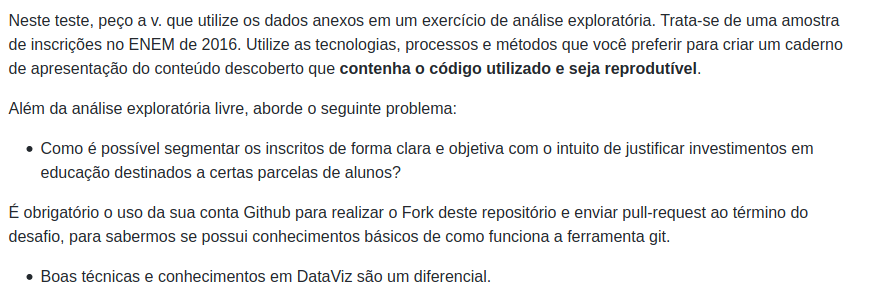

### Importação das bibliotecas

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="white", context="talk")
warnings.filterwarnings('ignore')

### Carregamento de arquivos e primeiras análises

Vamos primeiramente abrir o arquivo csv contendo os dados:

In [3]:
micro_enem = pd.read_csv("Microdados_Enem_2016.csv")

O dicionário presente também é importante para trazer uma explicaçã para as colunas presentes no texto. Vamos ver uma amostra dos dados carregados

In [4]:
micro_enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


Toda a lista de colunas contém as classes:

In [5]:
micro_enem.columns.tolist()

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

### Check de consistência e criação de nova informação de notas

Vamos analisar o ano de realização da prova para consistência da análise:

In [6]:
micro_enem["NU_ANO"].unique()

array([2016])

Todos fizeram a prova no mesmo ano, logo, comparar notas aqui faz sentido

.

Vamos separar as notas e descartar os casos faltantes para calcular uma média de nota por aluno. A partir de agora, não consideraremos as notas de alunos que não realizaram todas as provas do enem sem perder nenhum dia.

In [7]:
micro_enem = micro_enem.dropna(subset=['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [8]:
micro_enem

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
5,6,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,2016,2902005,Aracatu,29,BA,18,F,0.0,...,NaN,A,A,A,A,A,A,A,A,A
6,7,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,2016,5102637,Campo Novo do Parecis,51,MT,18,F,0.0,...,0.0,A,A,A,B,B,A,A,A,A
7,8,2eb189d4912f64b19d1967e8e84b6141aba18770,2016,4301602,Bagé,43,RS,18,F,0.0,...,NaN,C,A,A,A,A,D,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A
13726,4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,...,NaN,A,A,B,B,A,A,A,A,A
13727,4584,5354503700ecf2388f68990435390b6e1ad454ee,2016,4322186,Tupanci do Sul,43,RS,15,F,0.0,...,NaN,A,A,A,A,C,A,A,A,A
13728,4585,c7a9e94a42bd76b7978f13c013a61702e36cc42c,2016,3303203,Nilópolis,33,RJ,36,M,1.0,...,5.0,A,A,A,A,D,A,A,A,D


In [9]:
notas_alunos = micro_enem[['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].dropna()

Podemos agora calcular a média por matéria por curiosidade e a média por aluno:

In [10]:
notas_alunos.mean(axis=0)

NU_NOTA_CN         473.912509
NU_NOTA_CH         530.346123
NU_NOTA_LC         516.665059
NU_NOTA_MT         482.648638
NU_NOTA_REDACAO    529.452907
dtype: float64

In [11]:
nota_alunos = notas_alunos.mean(axis=1)
micro_enem['nota_final']=nota_alunos

Nesse momento, temos uma nota final média por aluno como nova variável. Usaremos ela em análises

### Análise de estados

Vamos realizar agora uma primeira exploração associando o estado do aluno com sua respectiva nota. Vamos listar de ordem decrescente para analisarmos os piores estados e melhores

In [12]:
uf_nota = micro_enem[['SG_UF_RESIDENCIA','nota_final']]

Piores Estados por nota:

In [13]:
uf_nota.groupby('SG_UF_RESIDENCIA').mean().sort_values('nota_final')[:5]

,nota_final
SG_UF_RESIDENCIA,
AP,481.381154
AC,482.428333
AM,482.753176
PI,482.778966
CE,485.286964


Melhores Estados por nota:

In [14]:
uf_nota.groupby('SG_UF_RESIDENCIA').mean().sort_values('nota_final')[-5:]

,nota_final
SG_UF_RESIDENCIA,
SC,518.533493
MG,526.114802
SP,526.153172
DF,528.897391
RJ,533.259407


Antes de tomar conclusões, é importante analisarmos também quantos elementos participam de cada grupo. Por exemplo, pode-se ver que o estados que estão em melhor posição são estados pouco populosos na listagem. Também vamos olhar o desvio padrão, para entendermos se temos um dado com pouca variação, mesmo com uma população pouco representativa

In [15]:
uf_nota.groupby('SG_UF_RESIDENCIA').agg(['mean', 'std', 'count']).sort_values(('nota_final','mean'))

nota_final                 
                        mean        std count
SG_UF_RESIDENCIA                             
AP                481.381154  64.282866    52
AC                482.428333  51.533623    48
AM                482.753176  55.910816   170
PI                482.778966  60.066768   232
CE                485.286964  72.343374  1367
MA                485.741302  63.400436   461
RO                489.641235  64.109877    81
TO                490.354394  65.344649   132
MS                493.286462  66.341393   130
BA                494.734584  67.011198   661
AL                496.118563  64.941265   167
PB                498.024240  69.678411   250
PA                498.518963  65.364955   463
MT                500.766667  70.955586   189
PE                501.945966  70.118689   466
RR                501.969091  86.842970    22
GO                503.794450  75.212890   382
SE                506.215232  78.153572   151
PR                507.618218  65.769643   449
ES                513.468910  68.224146   211
RN                513.504216  73.802413   185
RS                513.992275  73.413912   378
SC                518.533493  70.461540   209
MG                526.114802  77.316388  1008
SP                526.153172  77.068543  1532
DF                528.897391  81.717482   161
RJ                533.259407  76.269547   540

A amostra é bem pequena comparando-se o número total de inscritos no ENEM, porém de certa forma representativa. Dos 5 piores estados, 3 são da região norte e 2 da região nordeste. Possivelmente, a região norte ou nordeste são as com pior desempenho. Vamos verificar isso a seguir

### Análise de região do país

Podemos fazer essa divisão também por região, já que o código do município, contém a região como primeiro dígito identificador

In [16]:
regiao_nota = micro_enem[['CO_MUNICIPIO_RESIDENCIA','nota_final']]

In [17]:
regiao_nota['região'] = regiao_nota['CO_MUNICIPIO_RESIDENCIA'].astype("str").apply(lambda x:x[0])
del regiao_nota['CO_MUNICIPIO_RESIDENCIA']

vamos pegar uma amostra da UF só para conseguirmos identificar o que é cada número de região:

In [18]:
pd.concat([uf_nota[:5],regiao_nota['região'][:5]], axis=1)

,SG_UF_RESIDENCIA,nota_final,região
0,RS,486.46,4
1,CE,531.48,2
5,BA,483.66,2
6,MT,519.60,5
7,RS,608.66,4


podemos então ver que 1 é norte, 2 é nordeste, 3 é sudeste, 4 é sul, e 5 é centro-oeste (único não representado na amostra). Vamos criar um mapa para localizar as regiões por nome:

In [19]:
map_region = {'1':'norte', '2':'nordeste', '3':'sudeste', '4':'sul', '5':'centro-oeste'}

Vamos agora agrupar as métricas por região, usando também a média, desvio e contagem de elementos para avaliarmos:

In [20]:
regiao_nota = regiao_nota.groupby('região').agg(['mean', 'std', 'count']).sort_values(('nota_final','mean'))

In [21]:
regiao_nota

nota_final                 
              mean        std count
região                             
2       492.142071  69.793170  3940
1       492.253864  63.764529   968
5       506.234455  75.056570   862
4       512.145907  69.653902  1036
3       526.494196  76.565347  3291

##### Trocando os nomes pelo nome da região e plotando:

In [22]:
regiao_nota['região'] = regiao_nota.index.to_series().apply(lambda x:map_region[x])
grades = regiao_nota[('nota_final','mean')].tolist()
regions = regiao_nota['região'].tolist()

Text(0, 0.5, 'Nota média do Enem')

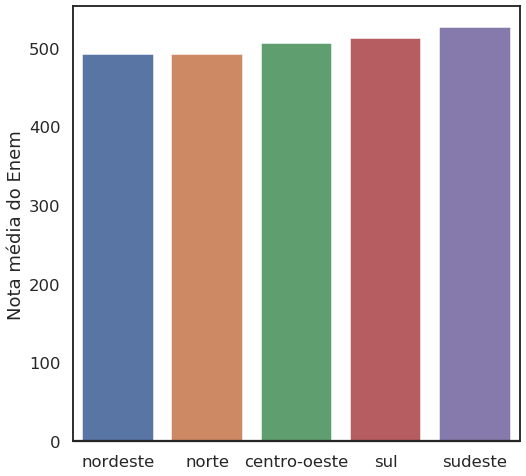

In [23]:
# PLOT

f, ax1 = plt.subplots(1, figsize=(8, 8))#, sharex=True)
sns.barplot(x=regions, y=grades, data=regiao_nota, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Nota média do Enem")

Apesar das notas  estarem próximas, as menores notas **dessa amostra** são do nordeste e norte, com índices quase iguais. Essa divisão, é similar à encontrada aqui: https://www.leiaja.com/carreiras/2019/07/02/veja-regioes-com-maior-e-menor-media-na-redacao-do-enem/. Apesar de serem de anos distintos, espera-se que o comportamento não tenha tanta variação de um ano para outro. Outro detalhe é que aqui estamos analisando uma amostra apenas do conjunto inteiro de dados

### Análise de Idade

Vamos realizar agora uma análise a partir da idade dos candidatos

In [24]:
age_grades = micro_enem[['NU_IDADE','nota_final']]
ages_grade = age_grades.groupby('NU_IDADE').agg(['mean', 'std', 'count'])

In [25]:
print(ages_grade.shape)

(53, 3)


In [26]:
ages_grade.head()

nota_final                 
                mean        std count
NU_IDADE                             
13        548.960000        NaN     1
14        526.392632  65.216209    19
15        503.040973  62.916497   226
16        506.344869  70.815245   879
17        514.773964  74.209700  2336

Como tivemos 53 possíveis idades aqui, a contagem dela deve ser bem variada. Vamos filtrar apenas idades com pelo menos 10 amostras para remoção de outliers

In [27]:
ages_grade = ages_grade[ages_grade[('nota_final','count')]>10]

In [28]:
ages = ages_grade.index.tolist()
grades = ages_grade[('nota_final','mean')].tolist()
df = ages_grade[('nota_final','mean')]

ages_grade['ages'] = ages_grade.index
ages_grade['value'] = ages_grade[('nota_final','mean')]

ages_grade = ages_grade[['ages', 'value']]

O gráfico abaixo relaciona a nota a idade dos participantes. É possível identificar que participantes mais 
jovens possuem melhores notas, o que poderá ser justificado na próxima análise

Text(0.5, 0.98, 'Nota Enem x Idade. Reta de regressão também plotada.')

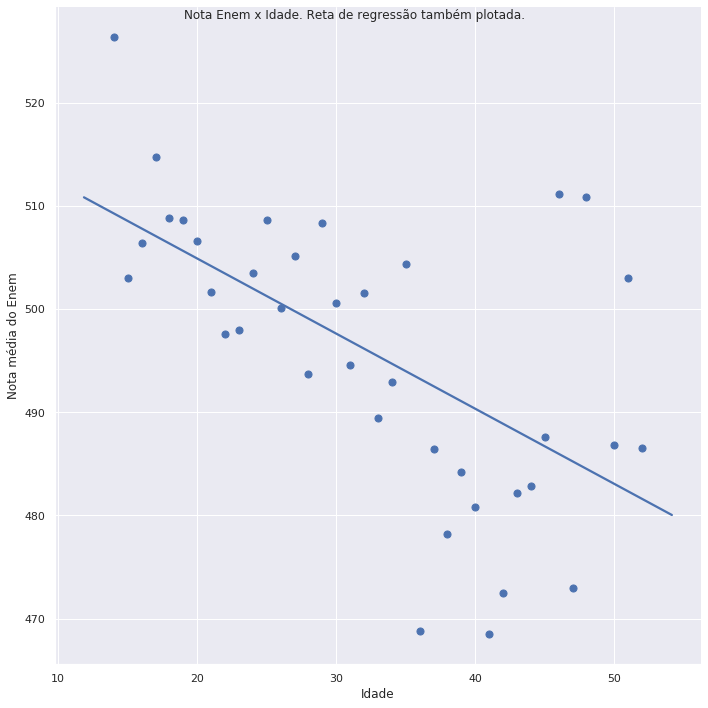

In [29]:
sns.set(style="darkgrid")
g = sns.lmplot(x="ages", y="value", data=ages_grade, ci=None, palette="muted", height=10, 
           scatter_kws={"s": 50, "alpha": 1}, truncate=False)

g.set_ylabels("Nota média do Enem")
g.set_xlabels("Idade")

fig = g.fig 
fig.suptitle("Nota Enem x Idade. Reta de regressão também plotada.", fontsize=12)

Vamos analisar agora a idade média das pessoas que trabalham e não trabalham

In [30]:
trabalho = micro_enem[['NU_IDADE', 'Q026']]

In [31]:
trabalho_map = {"A":"Nunca Trabalhei", "B": "Já Trabalhei", "C":"Trabalho"}

In [32]:
trabalho['trabalho']=trabalho['Q026'].apply(lambda x:trabalho_map[x])

Plotando a média de idade dos que trabalham e não trabalham

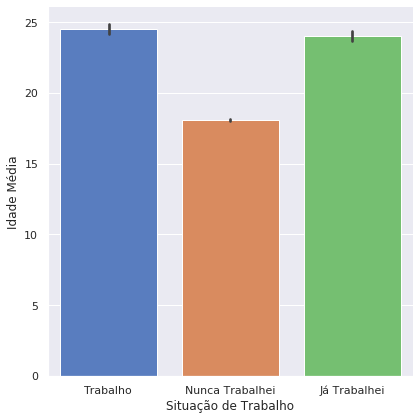

In [33]:
g = sns.catplot(x="trabalho", y="NU_IDADE", data=trabalho,
                height=6, kind="bar", palette="muted")
g.set_ylabels("Idade Média")
g.set_xlabels("Situação de Trabalho")

Ao analisar a idade média dos participantes que trabalham, é possível notar que participantes que trabalham ou já trabalharam (possívelmente desempregados) possuem idade média maior, e também são os que tendem a possuir menor média no Enem (após os 20 anos). Logo, o fator de gastar tempo trabalhando ao invés de estudar, é um possível motivo pelo qual as notas de pessoas com idade superior à 20 anos são mais baixas que a de jovens.

### Análise Etnias

Vamos analisar as notas por etnias declaradas no enem

In [34]:
ethnic = micro_enem[['TP_COR_RACA','nota_final']]
ethnic = ethnic.groupby('TP_COR_RACA').agg(['mean', 'std', 'count'])

etnics_map = {0:'Não Declar.',1:'Branca', 2:'Preto', 3:'Pardo', 4:'Amarelo', 5:'Indígena'}
ethnic['cor'] = ethnic.index.to_series().apply(lambda x:etnics_map[x])

grades = ethnic[('nota_final','mean')].tolist()
color = ethnic['cor'].tolist()

O gráfico abaixo relaciona o grupo étnico declarado pelo participante com sua nota. É possivel identificar que o grupo étnico "branco" possui maiores médias, enquanto o "indígena", piores. Novamente, devido a pequena quantidade de dados, a análise não pode ser tida como final:

Text(0, 0.5, 'Nota média do Enem')

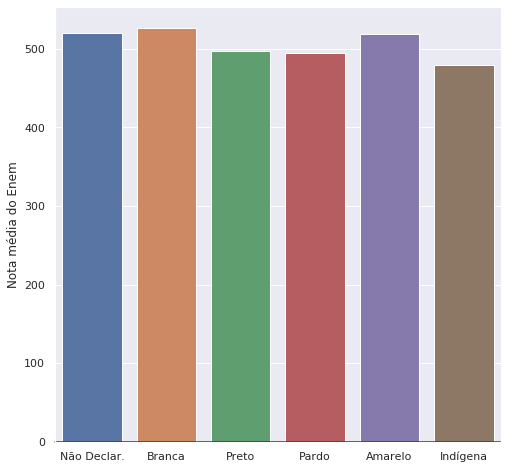

In [35]:
f, ax1 = plt.subplots(1, figsize=(8, 8))#, sharex=True)
sns.barplot(x=color, y=grades, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Nota média do Enem")

### Análise Tipo de Escola

In [36]:
school_type = micro_enem[['TP_ESCOLA','nota_final']]
school_type = school_type.groupby('TP_ESCOLA').agg(['mean', 'std', 'count'])#.sort_values(('nota_final','mean'))

In [37]:
school_type

nota_final                 
                 mean        std count
TP_ESCOLA                             
1          507.312146  73.100604  6468
2          491.108552  63.299710  3087
3          586.817745  80.157243   541
4          375.700000        NaN     1

Como é possível ver,a maioria dos estudantes do subconjunto não declarou o tipo de escola. Dos declarados, a maioria é de escola pública, com uma 569 indivíduos de escola particular. Como no exterior só possui um aluno, vamos retirá-lo da análise.

In [38]:
school_type = school_type[:3]

In [39]:
school_map = {1:'Não Declar.', 2:'Pública', 3:'Privada', 4:'Exterior'}
school_type['escola'] = school_type.index.to_series().apply(lambda x:school_map[x])

In [40]:
grades = school_type[('nota_final','mean')].tolist()
school = school_type['escola'].tolist()

Text(0, 0.5, 'Nota média do Enem')

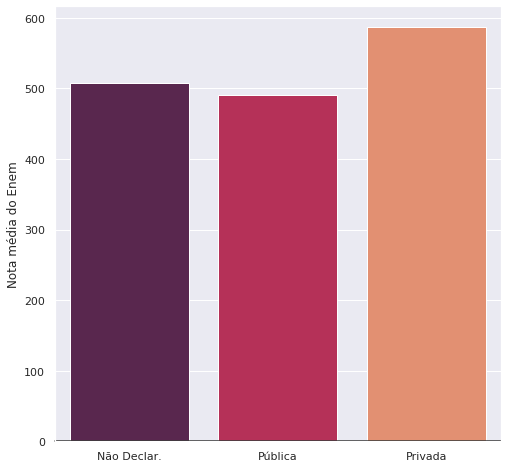

In [41]:
f, ax1 = plt.subplots(1, figsize=(8, 8))#, sharex=True)
sns.barplot(x=school, y=grades, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Nota média do Enem")

Ainda que a maior parte dos estudantes venha de escolas públicas, as melhores notas se encontram em alunos provenientes de escolas particulares

### Relação Tipos de Escolas e Tipos de Etnias

Aqui, realizaremos uma análise do tipo de escola e tipos de etnias para entendermos a relação de ambas

In [42]:
school_ethnic = micro_enem[['TP_ESCOLA', 'TP_COR_RACA', 'nota_final']]

In [43]:
school_ethnic['TP_COR_RACA'] = school_ethnic['TP_COR_RACA'].apply(lambda x:etnics_map[x])
school_ethnic['Tipo Escola'] = school_ethnic['TP_ESCOLA'].apply(lambda x:school_map[x])
del school_ethnic['TP_ESCOLA']

Faremos a análise em cima apenas do número de estudantes de escolas pública e privada:

In [44]:
school_ethnic = school_ethnic[(school_ethnic['Tipo Escola']=="Pública") | (school_ethnic['Tipo Escola']=="Privada")]

Agora, relacionando grupo étnico e escola de origem com as notas, pode-se ver que independente do grupo étnico,
as notas de alunos provenientes de escolas públicas são mais baixas que notas de alunos provenientes de escolas particulares:

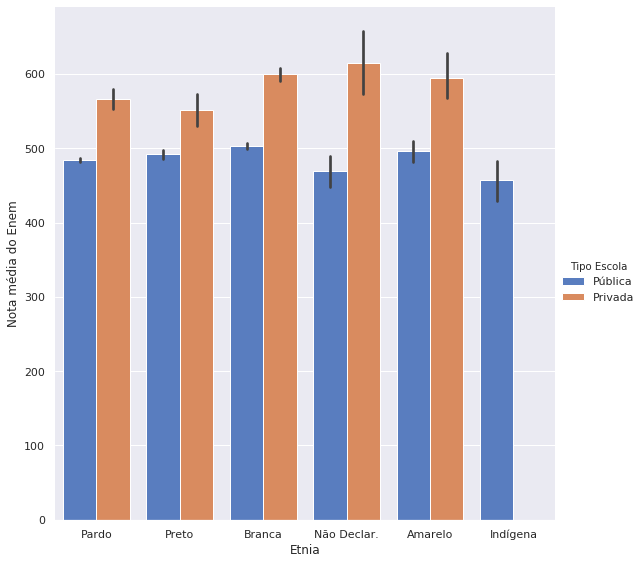

In [45]:
g = sns.catplot(x="TP_COR_RACA", y="nota_final", hue="Tipo Escola", data=school_ethnic,
                height=8, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Nota média do Enem")
g.set_xlabels("Etnia")

Os Negros (Pretos e Pardos) tendem a ter um resultado inferior aos Brancos e amarelos nas escolas privadas. Além do tipo de escola, é importante analisar como as etnias se comportam com relação à renda familiar. Isso pode ajudar a evidenciar o fato de que em escolas particulares, ainda existe uma grande distinção entre escolas mais caras e mais baratas. Logicamente, se os negros possuem menos renda, mesmo estudando em escola particular eles estudarão em escolas com menor desempenho. 

Vamos à análise para ver se confirma nossa hipótese:

In [46]:
color_income = micro_enem[['TP_ESCOLA', 'TP_COR_RACA', 'Q006']]

In [47]:
etnics_map = {0:'Não Declar.',1:'Branca', 2:'Preto', 3:'Pardo', 4:'Amarelo', 5:'Indígena'}
color_income['cor'] = color_income['TP_COR_RACA'].apply(lambda x:etnics_map[x])

In [48]:
del color_income['TP_ESCOLA']
del color_income['TP_COR_RACA']

brancos = color_income[color_income['cor']=='Branca']
negros = color_income[(color_income['cor']=='Preto') | (color_income['cor']=='Pardo')]

Nos gráficos a seguir, analisaremos apenas os casos de negros e brancos por terem mais relevância estatística. Vamos analisar as diferentes classes sociais, sendo que **A** equivale a nenhuma renda familiar, **B** equivale a renda de até 880,00 reais, **C** de 880,01 até 1320,00 reais, até **Q** que é mais de 17.600,00 reais.

Text(0.5, 1.0, 'Renda Média de Brancos')

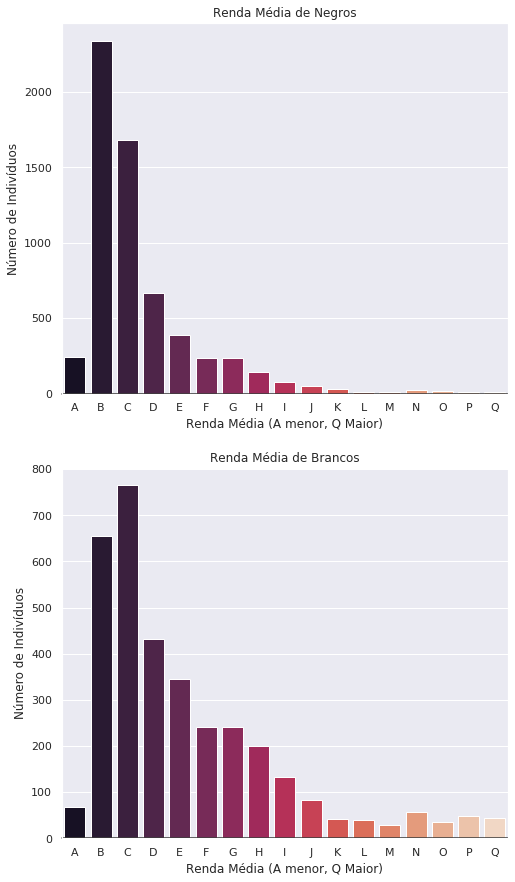

In [49]:
g_negros = negros.groupby("Q006").count()
g_brancos = brancos.groupby("Q006").count()

f, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 15))#, sharex=True)
sns.barplot(x=g_negros.index, y=g_negros['cor'], palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Número de Indivíduos")
ax1.set_xlabel("Renda Média (A menor, Q Maior)")
ax1.set_title("Renda Média de Negros")

sns.barplot(x=g_brancos.index, y=g_brancos['cor'], palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Número de Indivíduos")
ax2.set_xlabel("Renda Média (A menor, Q Maior)")
ax2.set_title("Renda Média de Brancos")


Percebe-se no gráfico acima que negros possuem renda inferior à renda de brancos. Isso está diretamente ligado ao desempenho escolar, que pode ser justificado pelos negros terem desempenho inferior tanto em escolas públicas como em escolas privadas 

### Análise de gênero

Aqui, vamos fazer uma seleção dos gêneros pela nota do Enem

In [50]:
gender = micro_enem[['TP_SEXO','nota_final']]

Text(0.5, 1.0, 'Distribuição de notas por gênero')

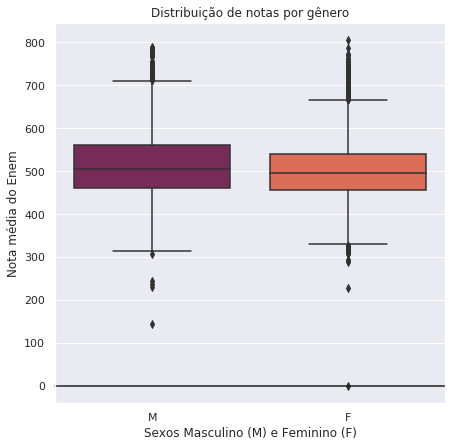

In [51]:
f, ax1 = plt.subplots(1, figsize=(7, 7))#, sharex=True)
sns.boxplot(x="TP_SEXO", y="nota_final", data=gender, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Nota média do Enem")
ax1.set_xlabel("Sexos Masculino (M) e Feminino (F)")

ax1.set_title("Distribuição de notas por gênero")

Analisando-se o gráfico acima, podemos ver que não existem variações significativas entre notas do Enem de pessoas dos sexos distintos

## Conclusão

**Nesse relatório, pudemos fazer diversas análises exploratórias em cima de um subconjunto de participantes do Enem 2016. Realizamos análise de gênero, classe social, idade, etnias, região, estados e tipo de escola (pública ou privada). Foi possível perceber que o conjunto de dados é muito, porém é possível extrair informações compatíveis com os dados oficiais, como por exemplo no desempenho inferior das regiões norte e nordeste nas notas do Enem. Conseguimos analisar também, que a idade tem uma relação inversamente proporcional à nota do Enem. Espera-se que alguém ainda no enino médio (perto dos 18 anos) tenha melhor desempenho. Um índice que ajuda a explicar esse fato é o trabalho. Vimos que a média de idade de pessoas que não trabalham é bem inferior à de quem trabalha.**

**Vimos também que os negros e indígenas tem desempenho inferior aos brancos e amarelos no Enem. Isso pode ser explicado pela diferença de renda familiar e consequentemente de condição satisfatória de estudo. A disparidade entre o desempenho de escola pública e privada é elevada, afetando diretamente o desempenho de pessoas de mais baixa renda, e consequentemente afetando mais pessoas negras que brancas. Isso se deve ao fato que a renda média das famílias negras ser inferior ao das famílias brancas.**

**Realizamos também uma análise de gênero, porém ambos possuem valores bem próximos de média e desvios**

**Concluimos que é fundamental um investimento do estado em ensino público de qualidade e ações principalmente focadas para comunidades mais carentes e povos indígenas, que possuem desempenho inferior no Enem. Também faz-se necessário um acompanhamento de pessoas com mais de 25 anos, que possivelmente estão tentando conseguir o diploma de ensino médio ou um ingresso tardio no ensino superior. AS pessoas com mais idade têm desempenho bem inferior aos jovens estudantes exclusivos e políticas de incentivo ao ensino adulto devem também ser adotadas, a fim de permitir a inclusão dessas pessoas no ensino superior.**